### EDA : Feature Engineering . Scaling
    Why are the Transformations required?
        1) Linear Regression -- Gradient Descent -- Global Minima
        2) Algorithms like KNN, K Means, hierarchial CLustering -- Euclidean Distance
##### Every point has some vectors, containing magnitude and Direction
        p1 = (x1,y1)= (24,54)
        p2 = (x2,y2)= (30,50)
##### Transformation techniques (Standardization or Scaling) 
    a) are not required in Ensemble methods, e.g., Decision Tree.
    b) are Required in Deep Learning Techniques:
        1) ANN --> Global Minima,  Gradient,
        2) CNN,
        3) RNN

# Types of Transformation
### 1) Normalization and Standardization
### 2) Scaling to Minimum and Maximum Values
        Used popularly for CNN
### 3) Scaling to Median and Quantiles
### 4) Guassian Transformation
      a)  Logarithmic Transformation
      b)  Reciprocal Transformation
      c)  Square Root Transformation
      d)  Exponential Transformation
      e)  Box Cox Transformation

# 4) Guassian Transformation
    Aim: Transform the data to make the distribution Normal / Gaussian
        Because, Linear and Logistic Regressions works well (Accuracy and Performancy) with Normal / Gaussian Distribution

In [1]:
import pandas as pd

# focussing on Features with Numerical Values
df = pd.read_csv('titanic_train.csv',usecols=['Survived','Age','Fare'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [2]:
# replacing Nan / null values with Median
df['Age'].fillna(df.Age.median(),inplace=True)
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,28.0,23.4500
889,1,26.0,30.0000


In [3]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat
import pylab

In [5]:
# Q-Q plot checks whether the feature is guassian or normally distributed
def plot_data(df,feature): # "df" = 1st variable, "feature" = 2nd variable 
    plt.figure(figsize=(10,6))
# plotting 2 diagrams
# left figure = Distribution in Histogram, Right Figure = Q-Q plot
    plt.subplot(1,2,1) # (1,2,1) = 1 row,2 column ,1st Index
    df[feature].hist() # dataframe for Histogram
    plt.subplot(1,2,2) # (1,2,1) = 1 row,2 column ,2nd Index
    stat.probplot(df[feature],dist='norm', plot=pylab)  # plotting Q-Q plot # "norm" as normalization
    plt.show()

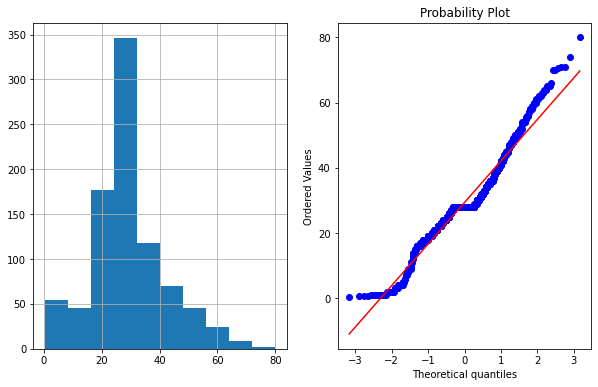

In [6]:
plot_data(df,'Age')
# Left diagram shows that Age is Normally distributed
# Right diagram shows that if (blue dots) data is algined with Red line, then data is Normally distributed

### 4) Guassian Transformation
# Technique a)  Logarithmic Transformation

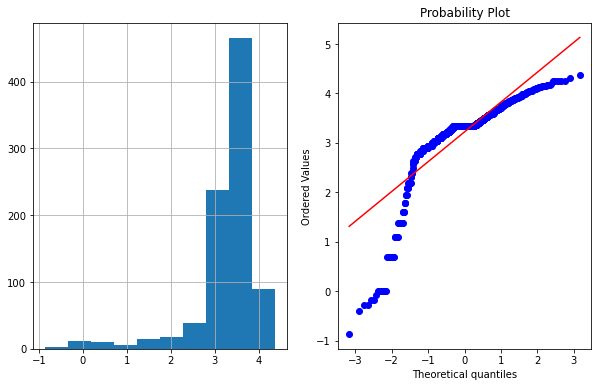

In [7]:
import numpy as np

# creating new feature 'Age_log'
df['Age_log'] = np.log(df['Age']) # Calcuting LOGarithmic values in the feature "Age"
plot_data(df,'Age_log')

# Blue dots are FAR away from red line, SO
# "Logarithmic Transformation" is not suitable in this case

### 4) Guassian Transformation
# Technique b) Reciprocal Transformation
    Calculate reverse / Inverse

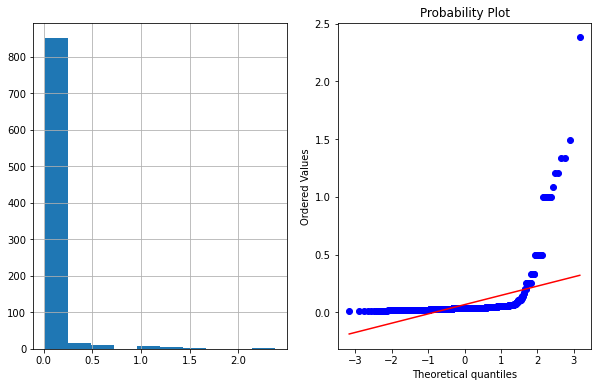

In [8]:
df['Age_reciprocal'] = 1/df.Age
plot_data(df,'Age_reciprocal')

### 4) Guassian Transformation
# Technique c)  Square Root Transformation
    Calculate Square Root

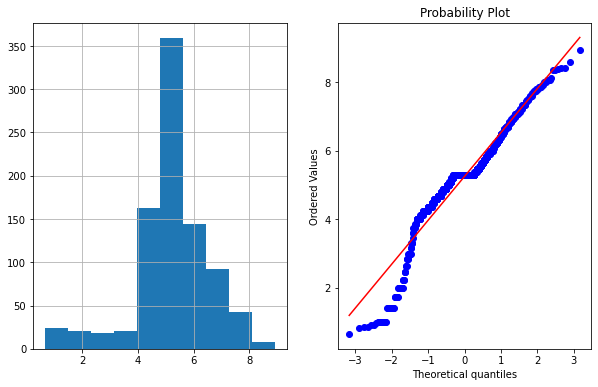

In [23]:
df['Age_SquareRoot'] = df.Age**(1/2)
plot_data(df,'Age_SquareRoot')

### 4) Guassian Transformation
# Technique d)  Exponential Transformation
    Calculate Exponential

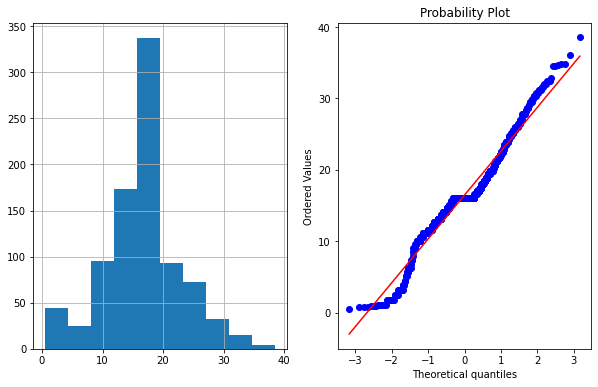

In [28]:
import numpy as np

df['Age_Exponential'] = df.Age**(1/1.2) # formulat to Calculate Exponential
plot_data(df,'Age_Exponential')

 ### 4) Guassian Transformation
# Technique e)  Box Cox Transformation
    Calculate

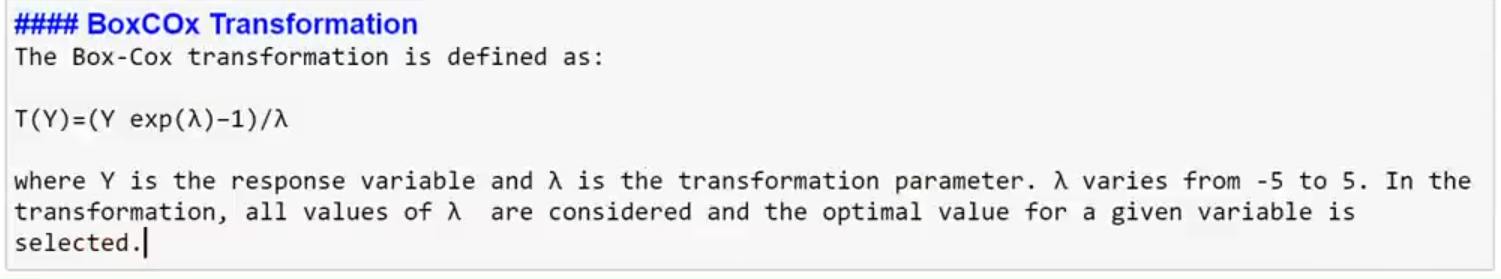

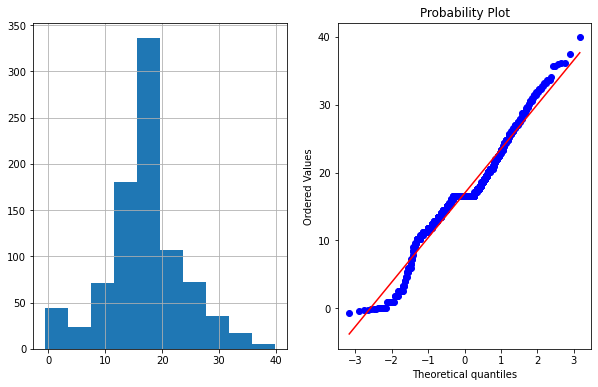

In [35]:
# lambda is "paramters" value
df['Age_BoxCox'],parameters=stat.boxcox(df['Age'])
plot_data(df,'Age_BoxCox')

# o/p blue dots are highly alligned with red lines

In [33]:
print(parameters)

0.7964531473656952
